# Curva S

#### Importando as Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando a base de dados

In [2]:
df = pd.read_csv('./bd_curva-s.csv', sep=';')
df['DT_REFERENCIA'] = pd.to_datetime(df['DT_REFERENCIA'], format='%d/%m/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109277 entries, 0 to 109276
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DT_REFERENCIA  109277 non-null  datetime64[ns]
 1   PROJETO        109277 non-null  object        
 2   TIPO           109277 non-null  object        
 3   VALOR_TEC      109277 non-null  int64         
 4   VALOR_COM      101875 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.2+ MB


#### Plotando o Gráfico

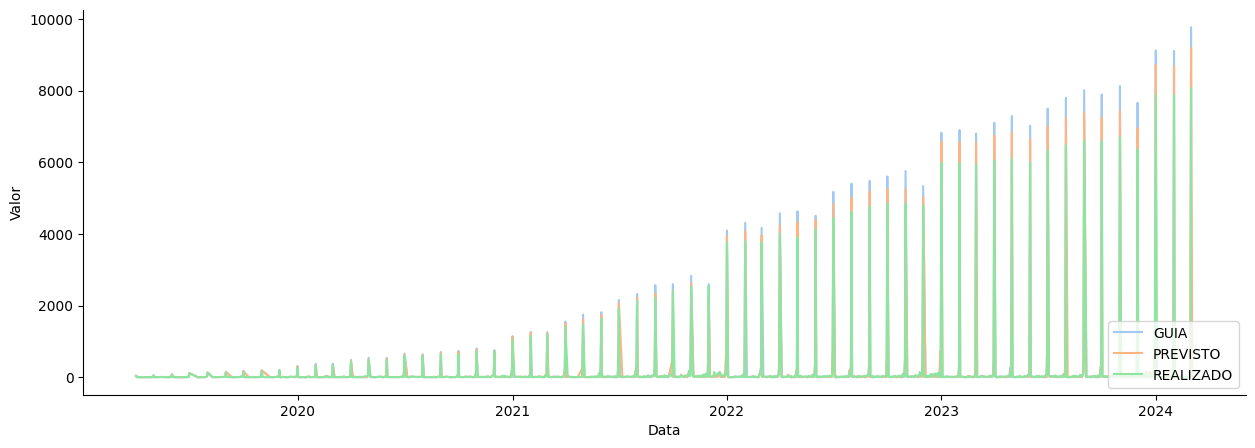

In [3]:
fig, ax = plt.subplots(figsize=(15,5))
curva = sns.lineplot(
    data=df
    ,x='DT_REFERENCIA', y='VALOR_TEC'
    ,hue='TIPO'
    ,markers=False, dashes=None, errorbar=None
    ,estimator='sum'
    ,palette='pastel'
)
plt.tick_params(axis='y', which='both', right=False, 
                left=True, labelleft=True)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
x=plt.xlabel('Data', fontsize=10)
y=plt.ylabel('Valor', fontsize=10)
lengenda=plt.legend(loc="lower right")

Opa. Esse gráfico não ficou muito legal!
Acontece que muitos projetos assumem vários valores durante um mesmo mes.

Um pequeno ajuste é agrupar os dados, ficando com o valor máximo de cada mês.

#### Ajustando a base de dados

In [4]:
# criando coluna ano-mes
def get_mes(data):
    return data.strftime('%Y%m')
df['ANO-MES'] = df.apply(lambda x: get_mes(x['DT_REFERENCIA']), axis=1)

# agrupando valores
df.groupby(by=['ANO-MES', 'PROJETO', 'TIPO']).max().reset_index()

# criando coluna dt_referencia
df['DT_REFERENCIA'] = pd.to_datetime(df['ANO-MES'], format='%Y%m')



#### Plotando o gráfico

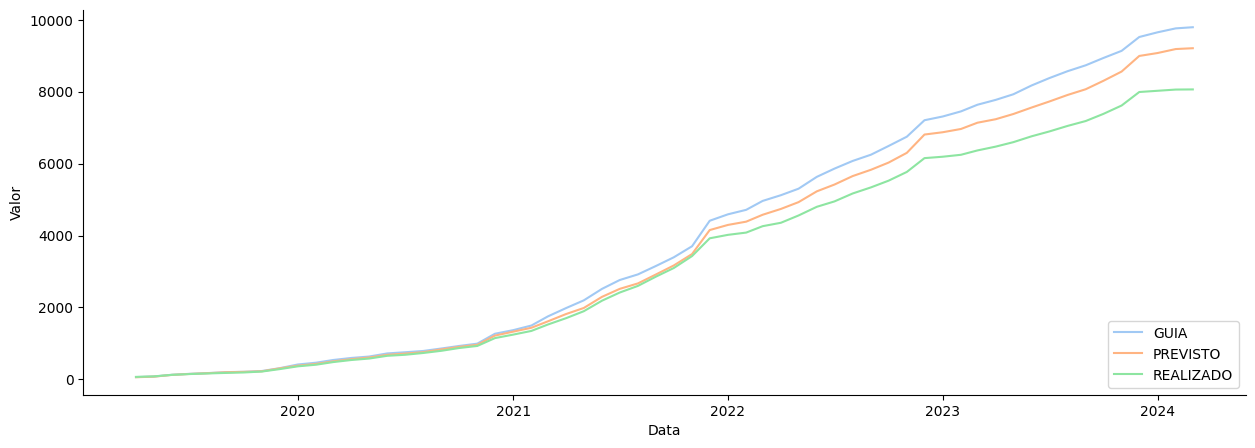

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
curva = sns.lineplot(
    data=df
    ,x='DT_REFERENCIA', y='VALOR_TEC'
    ,hue='TIPO'
    ,markers=False, dashes=None, errorbar=None
    ,estimator='sum'
    ,palette='pastel'
)
plt.tick_params(axis='y', which='both', right=False, 
                left=True, labelleft=True)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
x=plt.xlabel('Data', fontsize=10)
y=plt.ylabel('Valor', fontsize=10)
lengenda=plt.legend(loc="lower right")

Agora sim! Com os dados ajustados podemos analisar melhor o andamento dos nossos projetos.

Podemos também visualizar cada projeto separadamente. Pra isso, basta adicionar o método query() em nosso dataframe.

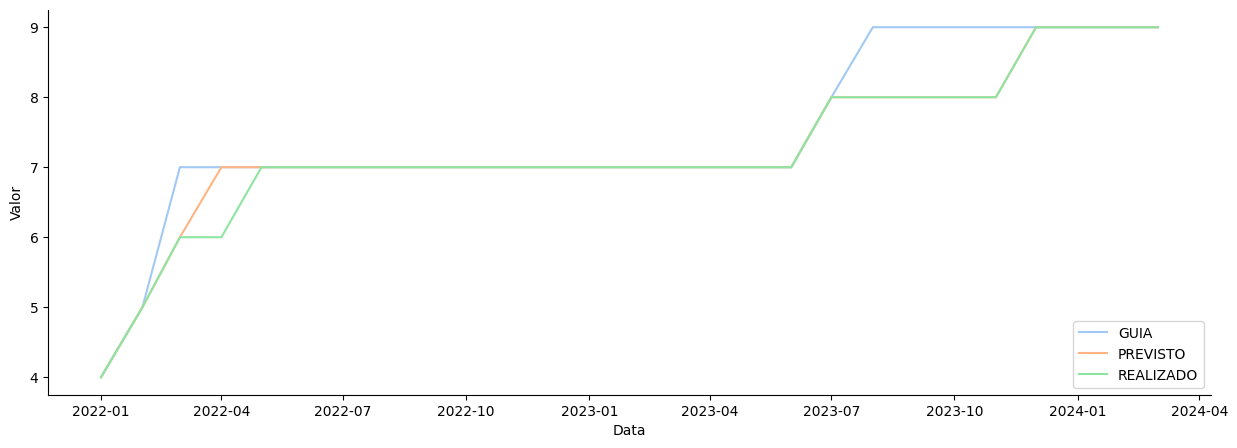

In [6]:
fig, ax = plt.subplots(figsize=(15,5))
curva = sns.lineplot(
    data=df.query("PROJETO=='PRJ-91919'") #selecionando apenas o projeto 'PRJ-91919'
    ,x='DT_REFERENCIA', y='VALOR_TEC'
    ,hue='TIPO'
    ,markers=False, dashes=None, errorbar=None
    ,estimator='sum'
    ,palette='pastel'
)
plt.tick_params(axis='y', which='both', right=False, 
                left=True, labelleft=True)
for pos in ['right', 'top']: 
    plt.gca().spines[pos].set_visible(False) 
x=plt.xlabel('Data', fontsize=10)
y=plt.ylabel('Valor', fontsize=10)
lengenda=plt.legend(loc="lower right")